# ML Regression Model Construction (Notebook 2)

## Objectives:
#### `1. Perform feature scaling.`
#### `2. Feature engineering & selection for the model.`
#### `2. Train with different major regression algorithms.`
#### `3. Test with different accuracy metrics.`
#### `3. Perform Hyperparameter tuning to increase accuracy.`

In [51]:
# Importing libraries

## For mathematical computations
import numpy as np

## For data analysis
import pandas as pd

## For data visualisations
import matplotlib.pyplot as plt
import seaborn as sns

## For encoding
from sklearn.preprocessing import LabelEncoder

### Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# For feature scaling
from sklearn.preprocessing import StandardScaler

# For cross validation
from sklearn.model_selection import cross_val_score,train_test_split, cross_validate,GridSearchCV

# Accuracy metrics
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import skew

### Importing dataset

In [52]:
df = pd.read_csv("final-dataset.csv")
df.head()

,Unnamed: 0,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,0,87.80,1,2009,84.00,1,0,0,7,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,1,57.00,1,2010,64.50,1,1,0,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,2,1,77.33,3,2007,85.17,3,1,0,7,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,3,1,84.30,1,2009,86.00,1,0,0,2,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,4,0,82.00,1,2008,75.00,1,1,0,7,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2998 non-null   int64  
 1   Gender                 2998 non-null   int64  
 2   10percentage           2998 non-null   float64
 3   10board                2998 non-null   int64  
 4   12graduation           2998 non-null   int64  
 5   12percentage           2998 non-null   float64
 6   12board                2998 non-null   int64  
 7   CollegeTier            2998 non-null   int64  
 8   Degree                 2998 non-null   int64  
 9   Specialization         2998 non-null   int64  
 10  collegeGPA             2998 non-null   float64
 11  CollegeCityTier        2998 non-null   int64  
 12  English                2998 non-null   int64  
 13  Logical                2998 non-null   int64  
 14  Quant                  2998 non-null   int64  
 15  Doma

In [54]:
# Dropping irrelevant column 'Unnamed: 0'
df.drop('Unnamed: 0', axis =1 , inplace=True)
df.columns

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

In [55]:
df.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,1,2009,84.00,1,0,0,7,73.82,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,1,2010,64.50,1,1,0,2,65.00,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,3,2007,85.17,3,1,0,7,61.94,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,1,2009,86.00,1,0,0,2,80.40,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,1,2008,75.00,1,1,0,7,64.30,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


## Feature engineering

### Feature scaling
#### Since MinMaxScaler is sensitive to any possible outliers as it scales data based on minimum and maximum values, we are going with Standardization which can be a safer alternative.

In [56]:
X = df.drop('Salary', axis = 1)
X.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,0,87.80,1,2009,84.00,1,0,0,7,73.82,...,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889
1,1,57.00,1,2010,64.50,1,1,0,2,65.00,...,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859
2,1,77.33,3,2007,85.17,3,1,0,7,61.94,...,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875
3,1,84.30,1,2009,86.00,1,0,0,2,80.40,...,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805
4,0,82.00,1,2008,75.00,1,1,0,7,64.30,...,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864


In [57]:
# Creating scaling object
scaler = StandardScaler()

In [58]:
X_scaled = scaler.fit_transform(X) # returns numpy array.

# Converting back to dataframe again with appropriate column names
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()


,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,-1.785259,1.013260,-0.909586,0.563442,0.868731,-0.920344,-3.502212,-0.295658,1.772553,0.284462,...,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,-0.117375,0.264404,1.296849,0.288196,0.427036
1,0.560143,-2.066396,-0.909586,1.176359,-0.885111,-0.920344,0.285534,-0.295658,-0.648897,-0.801597,...,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,1.143941,-0.084042,1.296849,0.663714,-0.143787
2,0.560143,-0.033623,0.509217,-0.662392,0.973962,0.468627,0.285534,-0.295658,1.772553,-1.178393,...,-0.535271,-0.251971,-0.200695,2.211137,-0.091418,0.535434,-0.260986,1.611850,-0.142422,-0.145376
3,0.560143,0.663300,-0.909586,0.563442,1.048612,-0.920344,-3.502212,-0.295658,-0.648897,1.094696,...,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,-0.397721,0.090181,0.338753,0.413401,0.617311
4,-1.785259,0.433325,-0.909586,-0.049475,0.059265,-0.920344,0.285534,-0.295658,1.772553,-0.887792,...,-0.535271,-0.251971,-0.200695,-0.309733,-0.091418,-1.425138,-0.914035,-1.102338,0.205578,0.325245


## Handling target variable for model

### Checking skewness to perform appropriate transformations

In [59]:
skewness = skew(df['Salary'])

if skewness > 1:
    print(f"The variable is highly positive.")
elif skewness < -1:
    print(f"The variable is highly negative.")
elif -1 <= skewness <= 1:
    print(f"The variable is approximately symmetric.")

The variable is highly positive.


Positive skew distribution means:
1. Mean is greater than median
2. Majority of the values lay on the left side of the distribution (also called left-skewed)
3. Large values on the right end of the distribution.

### Since target variable is highly right-skewed, we can apply log transformation on it.
Log transformation is a common mathemetical operation that is performed to make a variable's distribution more symmetric, stabilize the variance and reducing outliers impact, leading to improved model performance.

In [60]:
y = np.log(df['Salary'])
y

0       13.005830
1       11.608236
2       12.449019
3       12.948010
4       12.206073
          ...    
2993    11.695247
2994    11.695247
2995    12.860999
2996    13.180632
2997    12.206073
Name: Salary, Length: 2998, dtype: float64

#### Common doubt: Aren't we manipulating the target variable in this way?
#### Answer: NO. The transformation may effect the distribution but it DOES NOT change the inherent characteristics and the fundamental nature of the variable. Log transformation is a legitimate and widely used preprocessing technique.

#### We are not altering the original values themselves, but the way we look at them (just like scaling).

## Feature importance
#### In this section we analyse importance of features with respect to the target variable using ExtraTreesRegressor

In [61]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [62]:
importance_series = model.feature_importances_
names = X.columns

In [63]:
final = pd.Series(importance_series,index = X.columns)

<Axes: >

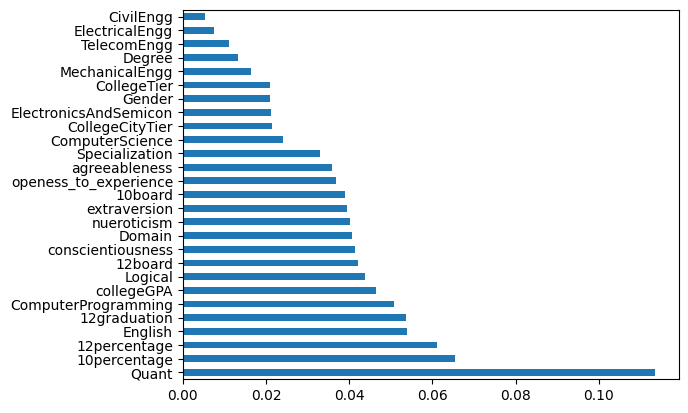

In [64]:
## Visualising results
final.nlargest(30).plot(kind = 'barh')

## Conclusion: 

#### 1. Quant (Quantitative/Mathematical skills) play the most important role in a student's salary.
#### 2. Percentages/Grades/GPA are crucial.
#### 3. English & Computer programming features play the next highest role with respect to the target 'Salary'.

### Observation: Grades, English, Quantitivate skills and AMCAT personality scores show the highest impact on the final salary received.

## Model building

### Defining list of all regression models

In [65]:
model_lr = LinearRegression()
model_ridge = Ridge()
model_lasso = Lasso()
model_svr = SVR()
model_dtr = DecisionTreeRegressor()
model_rfr = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_knr = KNeighborsRegressor()
model_mlpr = MLPRegressor()


## Evaluating models

In [66]:
def evaluate_model(model, X, y, cv=10):
    mae_scores = -cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))
    
    print('Model:', model.__class__.__name__)
    print('Average MAE:', mae_scores.mean())
    print('Average RMSE:', rmse_scores.mean())
    print('-' * 40)

In [67]:
# Evaluate and print metrics for each model
evaluate_model(LinearRegression(), X, y)
evaluate_model(Ridge(), X, y)
evaluate_model(Lasso(), X, y)
evaluate_model(SVR(), X, y)
evaluate_model(DecisionTreeRegressor(), X, y)
evaluate_model(RandomForestRegressor(), X, y)
evaluate_model(GradientBoostingRegressor(), X, y)
evaluate_model(KNeighborsRegressor(), X, y)
evaluate_model(MLPRegressor(max_iter=1000), X, y)

Model: LinearRegression
Average MAE: 0.3558987791568944
Average RMSE: 0.4700936982016922
----------------------------------------
Model: Ridge
Average MAE: 0.35589633677957255
Average RMSE: 0.47009019932427976
----------------------------------------
Model: Lasso
Average MAE: 0.4354403023640101
Average RMSE: 0.5447333774060853
----------------------------------------
Model: SVR
Average MAE: 0.36589370449975905
Average RMSE: 0.49062575452196705
----------------------------------------
Model: DecisionTreeRegressor
Average MAE: 0.5176744107831829
Average RMSE: 0.6852388697479266
----------------------------------------
Model: RandomForestRegressor
Average MAE: 0.35839031095204293
Average RMSE: 0.47842946965105543
----------------------------------------
Model: GradientBoostingRegressor
Average MAE: 0.35472210127916115
Average RMSE: 0.4725283603282945
----------------------------------------
Model: KNeighborsRegressor
Average MAE: 0.39217414576300896
Average RMSE: 0.5117912478597214
------

### Performing cross-validation for each model and printing respective results.

In [68]:
scores_lr = cross_val_score(LinearRegression(), X, y, cv=10)
print('Average R2 score of Linear regression: ', sum(scores_lr) / len(scores_lr))

scores_ridge = cross_val_score(Ridge(), X, y, cv=10)
print('Average R2 score of Ridge: ', sum(scores_ridge) / len(scores_ridge))

scores_lasso = cross_val_score(Lasso(), X, y, cv=10)
print('Average R2 score of Lasso: ', sum(scores_lasso) / len(scores_lasso))

scores_svr = cross_val_score(SVR(), X, y, cv=10)
print('Average R2 score of Support vector regressor: ', sum(scores_svr) / len(scores_svr))

scores_dtr = cross_val_score(DecisionTreeRegressor(), X, y, cv=10)
print('Average R2 score of Decision tree regressor: ', sum(scores_dtr) / len(scores_dtr))

scores_rfr = cross_val_score(RandomForestRegressor(), X, y, cv=10)
print('Average R2 score of Random forest regressor: ', sum(scores_rfr) / len(scores_rfr))

scores_gbr = cross_val_score(GradientBoostingRegressor(), X, y, cv=10)
print('Average R2 score of Gradient boosting regressor : ', sum(scores_gbr) / len(scores_gbr))

scores_knr = cross_val_score(KNeighborsRegressor(), X, y, cv=10)
print('Average R2 score of KNeighborsRegressor: ', sum(scores_knr) / len(scores_knr))

scores_mlpr = cross_val_score(MLPRegressor(max_iter=1000), X, y, cv=10)
print('Average R2 score of MLPRegressor: ', sum(scores_mlpr) / len(scores_mlpr))

Average R2 score of Linear regression:  0.2504625784216202
Average R2 score of Ridge:  0.2504743526348131
Average R2 score of Lasso:  -0.006319037862415389
Average R2 score of Support vector regressor:  0.18265162185643374
Average R2 score of Decision tree regressor:  -0.6099825795089198
Average R2 score of Random forest regressor:  0.22253137097730374
Average R2 score of Gradient boosting regressor :  0.24348108691199838
Average R2 score of KNeighborsRegressor:  0.11167955079033887
Average R2 score of MLPRegressor:  -0.5382029284224922


## Hyperparameter tuning on Ridge()

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Create the Ridge regression model
ridge = Ridge()

# Create the GridSearchCV object
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fit the model to the data
ridge_grid.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = ridge_grid.best_params_['alpha']
best_solver = ridge_grid.best_params_['solver']

print(f"Best alpha: {best_alpha}")
print(f"Best solver: {best_solver}")

# Get the best Ridge model
best_ridge_model = ridge_grid.best_estimator_

# Evaluate the model on the test set
ridge_r2 = best_ridge_model.score(X_test, y_test)
print(f"R2 Score for Ridge Regression: {ridge_r2:.2f}")

Best alpha: 10.0
Best solver: lsqr
R2 Score for Ridge Regression: 0.28


### R2 score increased from 0.25 => 0.28 through Hyperparameter tuning

## Visualising results

In [71]:
ridge_model = Ridge(alpha=10.0, solver = 'lsqr') 
ridge_model.fit(X_train, y_train)

# Predictions from the Ridge model
y_pred = ridge_model.predict(X_test)

# Calculating the R2 score
r2 = r2_score(y_test, y_pred)

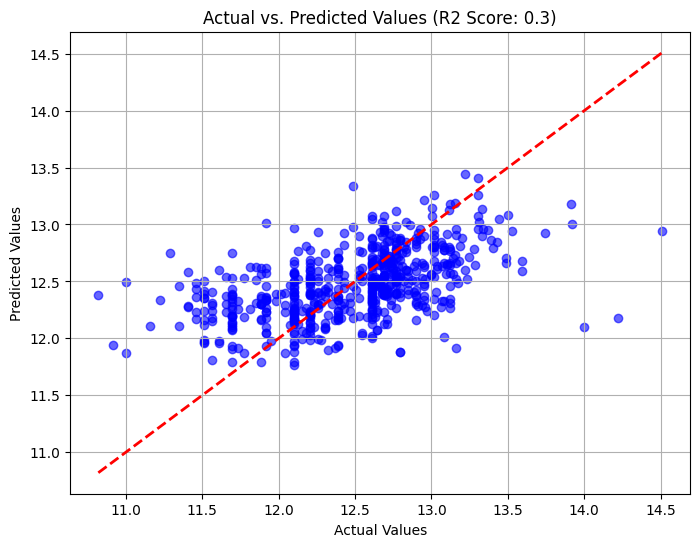

In [72]:
# Scatter plot of actual vs. predicted values with a diagonal line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (R2 Score: 0.3)')
plt.grid(True)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Ideal Prediction')

Although R2 score seemingly is low, it doesn't necessarily imply that the model has failed to learn from the data. R2 score of 0.3 means model is able to moderately capture roughly 30% of the variance in the predicted values out of total. Further statistical analysis can be done to further increase this but it is important to understand that many real-life problems may not be able to reach an R2 score above 0.5. It is more about deriving new findings and insights regarding features that are more valuable to solving real-life problems.

## Conclusion:
### 1. Data Transformation: We conducted essential data transformations, including feature scaling and log transformation on the target variable.
### 2. Feature Engineering: We performed feature engineering to enhance the quality of our dataset.
### 3. Feature Importance Analysis: Utilizing Extra Tree Regressor, we gained valuable insights into feature importance with respect to the target variable.
### 4. Derived Insights: Proper analysis revealed that certain features have a pronounced impact on the target, providing us to take further action.
### 5. Algorithm Testing: We evaluated the performance of all major regression algorithms, considering R-squared scores and other metrics.
### 6. Overfitting Prevention: To ensure robust results, we implemented cross-validation, guarding against overfitting and achieving accurate R2 scores.
### 7. Hyperparameter Tuning: The Ridge regression model demonstrated the highest performance and was further optimized through hyperparameter tuning, resulting in improved predictive accuracy.


## Made by: Hrishikesh Reddy Papasani
### GitHub profile: https://github.com/Hrishikesh-Papasani
### Connect on LinkedIn: https://www.linkedin.com/in/hrishikesh-reddy-papasani-02110725a/